# Feature selection
Correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification. Apart from these, principle component analysis are used to observe number of components.

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import time
import warnings
warnings.filterwarnings('ignore')


### Loading the data

In [7]:
data = pd.read_csv('data.csv')
data.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [11]:
# Drop unnamed, diagnosis & id
data.dtypes
y = data.diagnosis
list2drop = ['Unnamed: 32','id','diagnosis']
x = data.drop(list2drop,axis=1)

x.head(3)


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


B: 357
M: 212


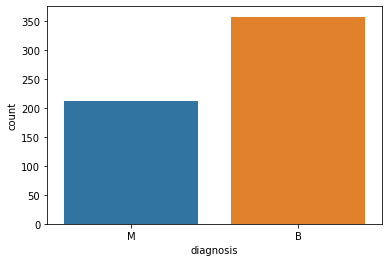

In [14]:
ax = sns.countplot(y,label = 'count')

B, M = y.value_counts()

print('B:', B)
print('M:', M)

### Feature Analysis

In [15]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Visualization

## Violin Plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

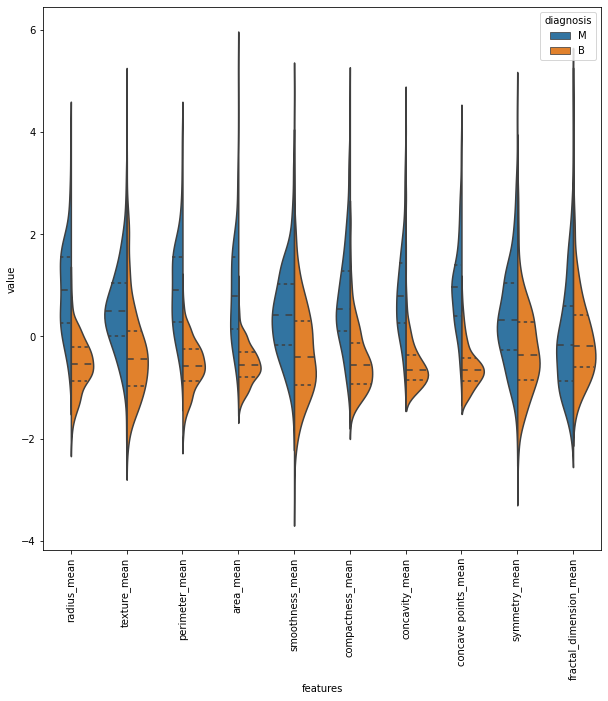

In [30]:
data_dia = y
data = x
data_n_2 = (data-data.mean())/data.std() #standarization 
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features",y="value",hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)


#### From this plot, it is interesting to note that the feature texture is good for classification. However, fractial dimension seems to not give good info for classification

## next 10 features...

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

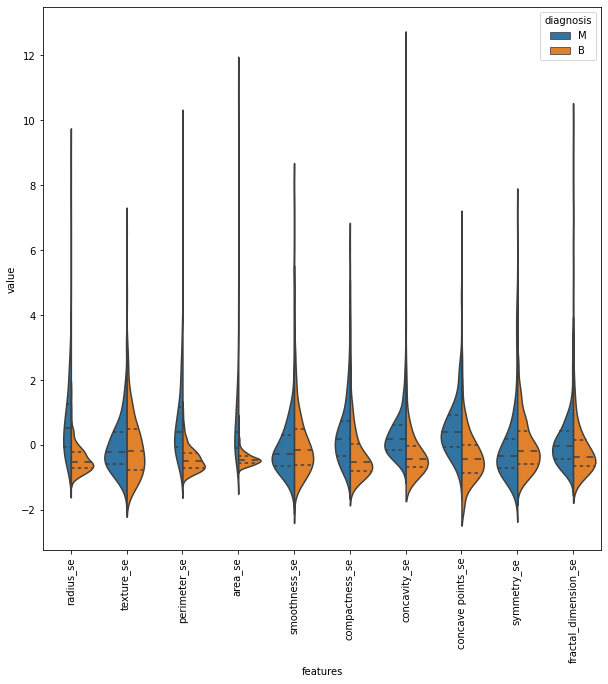

In [31]:
data_dia = y
data = x
data_n_2 = (data-data.mean())/data.std() #standarization 
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features",y="value",hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)


### next 10 features ...

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

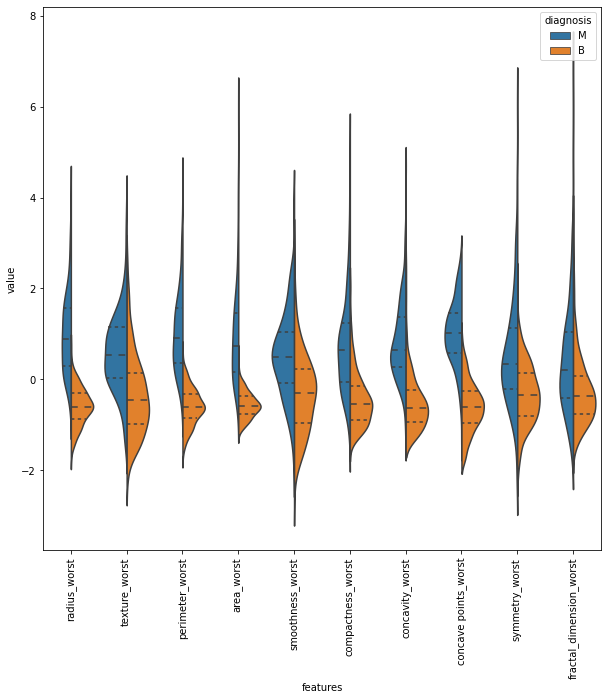

In [32]:
data_dia = y
data = x
data_n_2 = (data-data.mean())/data.std() #standarization 
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')

plt.figure(figsize=(10,10))
sns.violinplot(x="features",y="value",hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)


Other kind of plot to cheack distribution but also outliers is: boxplot

## Boxplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

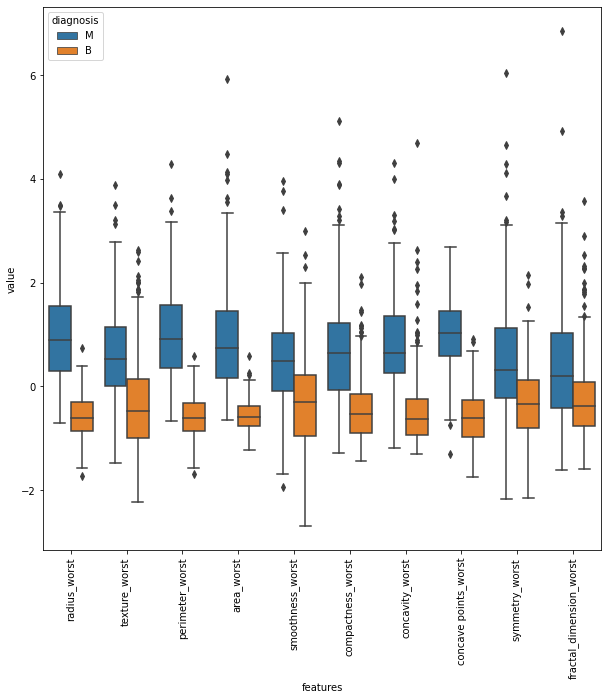

In [35]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features",y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

Let's take a closer look to two features that might be correlated: concave_points_worst & concavity_worst

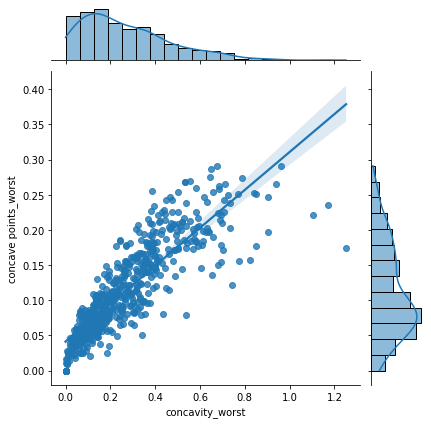

In [37]:
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,"co ncave points_worst"], kind ="reg")

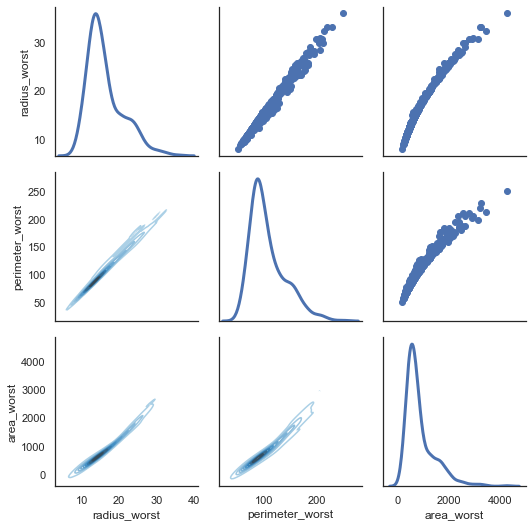

In [44]:
# Analysing radius_worst, area_worst, perimeter_worst
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Other plot that I particulary like for this is swarm plot:


## Swarm Plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

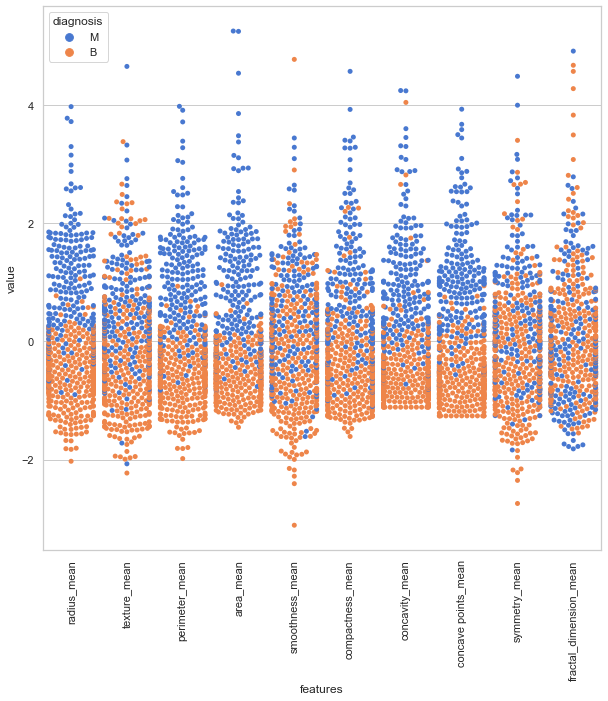

In [45]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

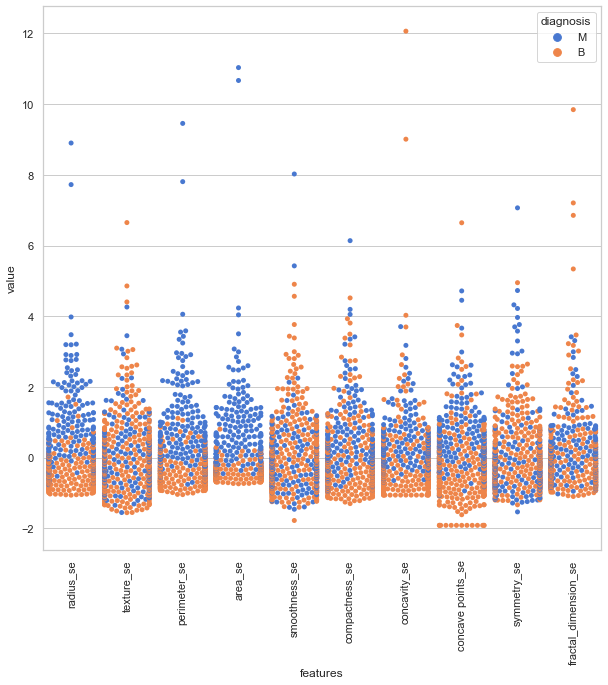

In [46]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  351.24373960494995  s


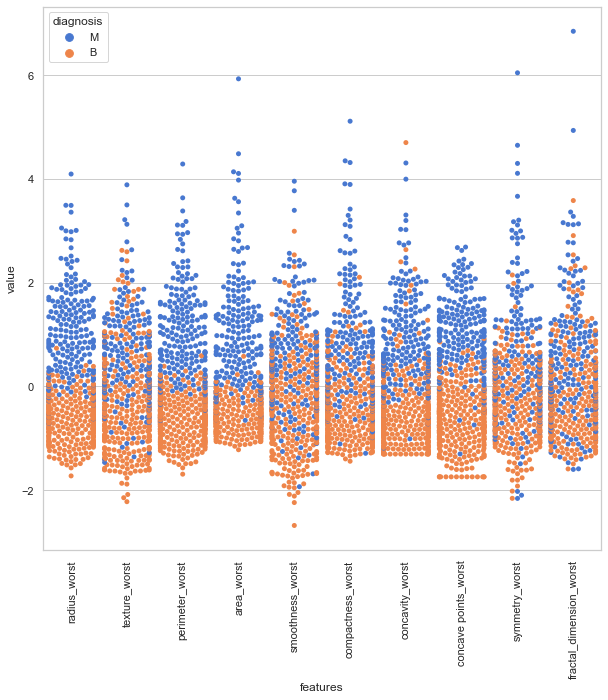

In [47]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")

This kind of plot allows us to see the variance more clear. For a bigger picture, let us now do a correlation map 

## Correlation Map

<AxesSubplot:>

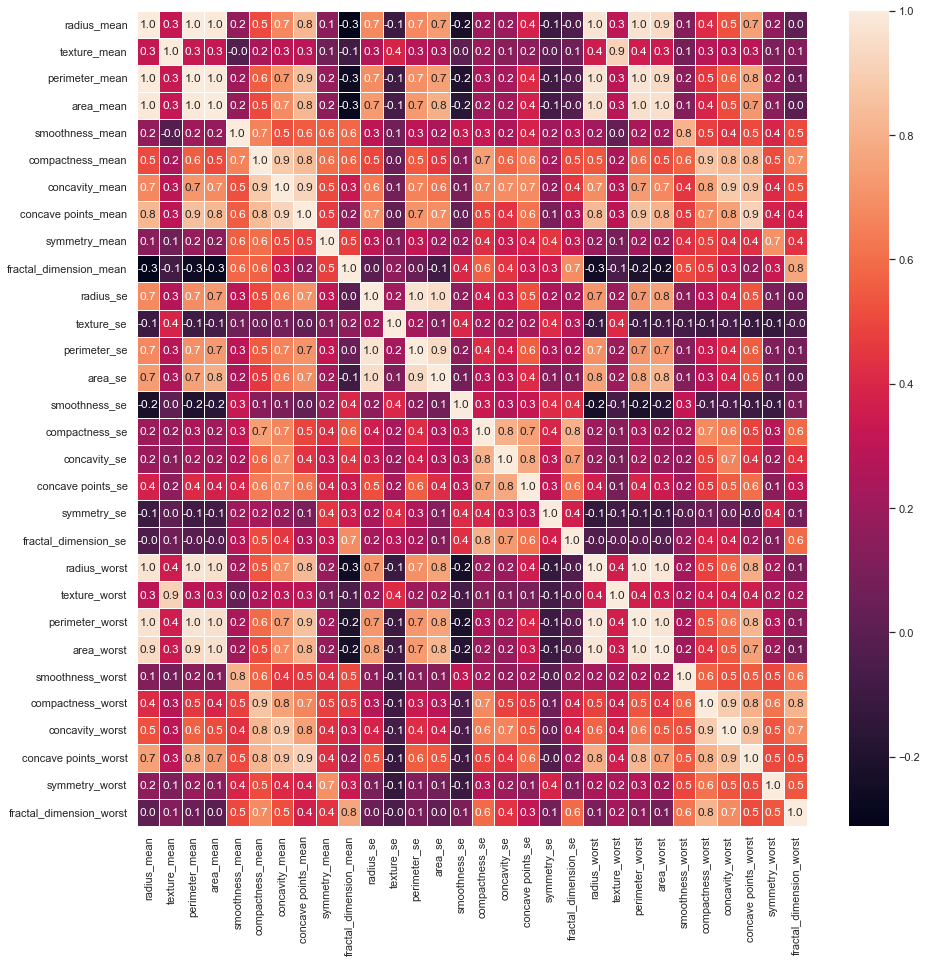

In [53]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(x.corr(), annot = True, linewidth = .5, fmt = '.1f',ax=ax)

# Feature Selection


## 1. Feature selection with correlation and *Random Forest Classification*

From the correlated features we will pick only one:
1. radius_mean, perimeter_mean and area_mean -> **area_mean**
2. Compactness_mean, concavity_mean and concave points_mean -> **concavity_mean**
3. radius_se, perimeter_se and area_se -> **area_se**
4. radius_worst, perimeter_worst and area_worst -> **area_worst**
5. Compactness_worst, concavity_worst and concave points_worst -> **concavity_worst**
6. Compactness_se, concavity_se and concave points_se -> **concavity_se**
7. texture_mean and texture_worst -> **texture_mean**
8. area_worst and area_mean -> **area_mean**


In [54]:
drop_list = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list,axis=1)
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<AxesSubplot:>

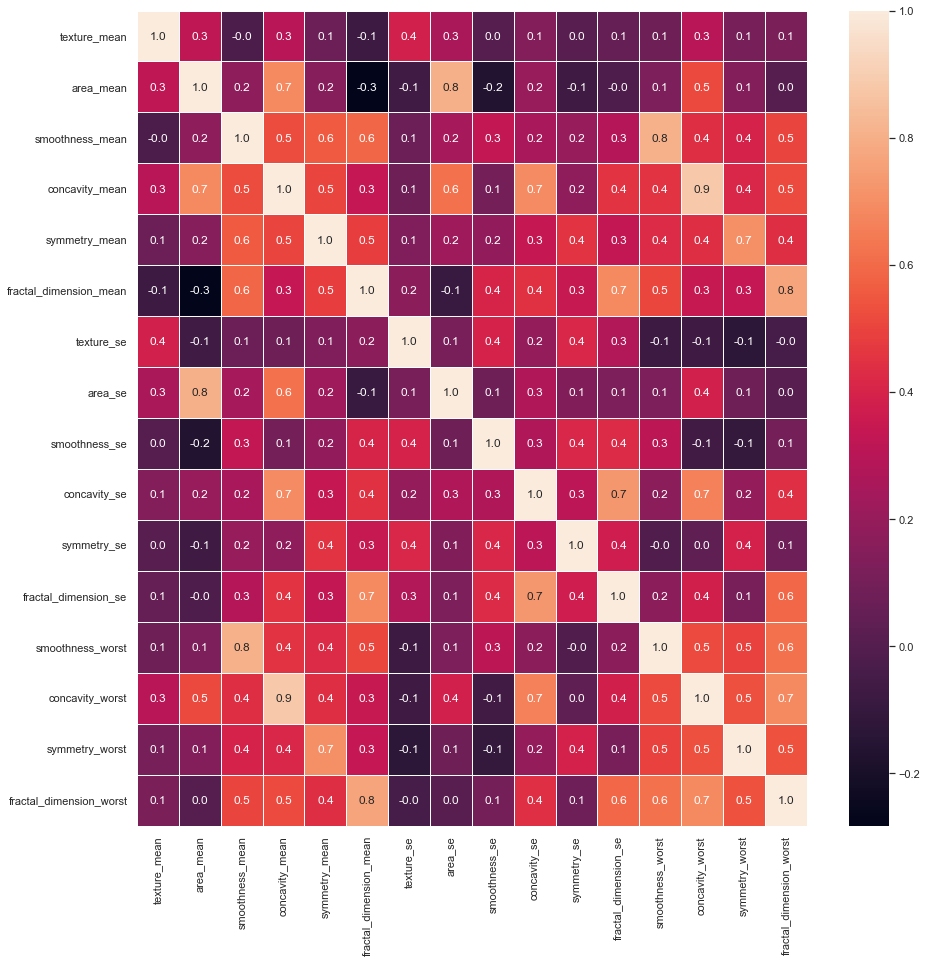

In [55]:
# new correlated heatmap
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(x_1.corr(), annot = True, linewidth = .5, fmt = '.1f',ax=ax)

### Training with Random Forest

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

Acc =  0.9649122807017544


<AxesSubplot:>

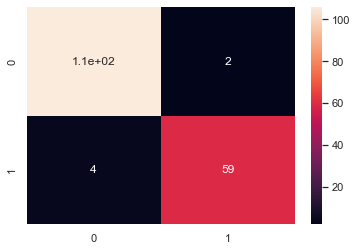

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x_1,y, test_size = 0.3, random_state=42)

#random fores classifier with n_est = 10 bc default
rf_model = RandomForestClassifier(random_state=43)
rf_model.fit(x_train,y_train)

ac = accuracy_score(y_test, rf_model.predict(x_test))
print('Acc = ', ac)
cm = confusion_matrix(y_test, rf_model.predict(x_test))
sns.heatmap(cm, annot=True)

## 2. Univariate feature selection and Random Forest Classification

SelectKBest removes all but the k highest scoring features

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# lets use k=5

select_feature = SelectKBest(chi2, k=5).fit(x_train,y_train)
print('score list: ', select_feature.scores_)
print('feature list: ', x_train.columns)



score list:  [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
feature list:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Let's see how it goes with the 5 chosen features

Accuracy is:  0.9590643274853801


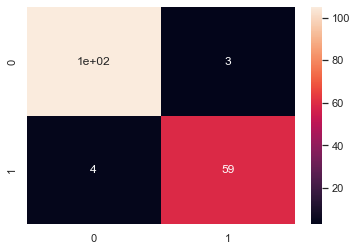

In [67]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

#Random forest classifier with n = 10 default again
rf_model_2 = RandomForestClassifier()
rf_model_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test, rf_model_2.predict(x_test_2))
cm_2 = confusion_matrix(y_test, rf_model_2.predict(x_test_2))
sns.heatmap(cm_2, annot = True)
print('Accuracy is: ',ac_2)


## 3. Recursive feature elimination (RFE) with random forest

RFE assigns weights to each of the features. The process is recursive and the smallest weights are dropped

In [69]:
from sklearn.feature_selection import RFE
rf_model_3 = RandomForestClassifier()
rfe = RFE(estimator=rf_model_3,n_features_to_select=5, step=1)
rfe.fit(x_train, y_train)

print("Selected features by RFE:", x_train.columns[rfe.support_])

Selected features by RFE: Index(['area_mean', 'concavity_mean', 'area_se', 'concavity_worst',
       'symmetry_worst'],
      dtype='object')


## 4. Recursive feature elimination with cross validation and random forest classification¶
  

RFECV select which features and how many!


In [72]:
from sklearn.feature_selection import RFECV
rf_model_4 = RandomForestClassifier()
rfecv = RFECV(estimator=rf_model_4, cv=5, step = 1, scoring='accuracy')
rfecv.fit(x_train,y_train)

print('optimal number of features: ', rfecv.n_features_)
print("Best features: ", x_train.columns[rfecv.support_])

optimal number of features:  13
Best features:  Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'smoothness_se', 'concavity_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Lets check # features vs acc:

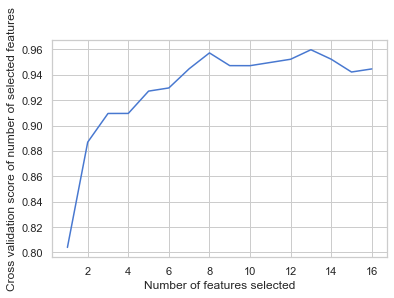

In [73]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## 5. Tree based feature selection and random forest classification

**featureimportances** attribute from Random Forest classifier. To use the feature_importance method, in trainign there should not be correlated feaatures.

Feature ranking:
1. feature 3 (0.234644)
2. feature 1 (0.210001)
3. feature 13 (0.146617)
4. feature 7 (0.133069)
5. feature 14 (0.043450)
6. feature 9 (0.043448)
7. feature 0 (0.034039)
8. feature 2 (0.026427)
9. feature 12 (0.024313)
10. feature 5 (0.018350)
11. feature 15 (0.018187)
12. feature 11 (0.016982)
13. feature 10 (0.015184)
14. feature 8 (0.013157)
15. feature 4 (0.012013)
16. feature 6 (0.010120)


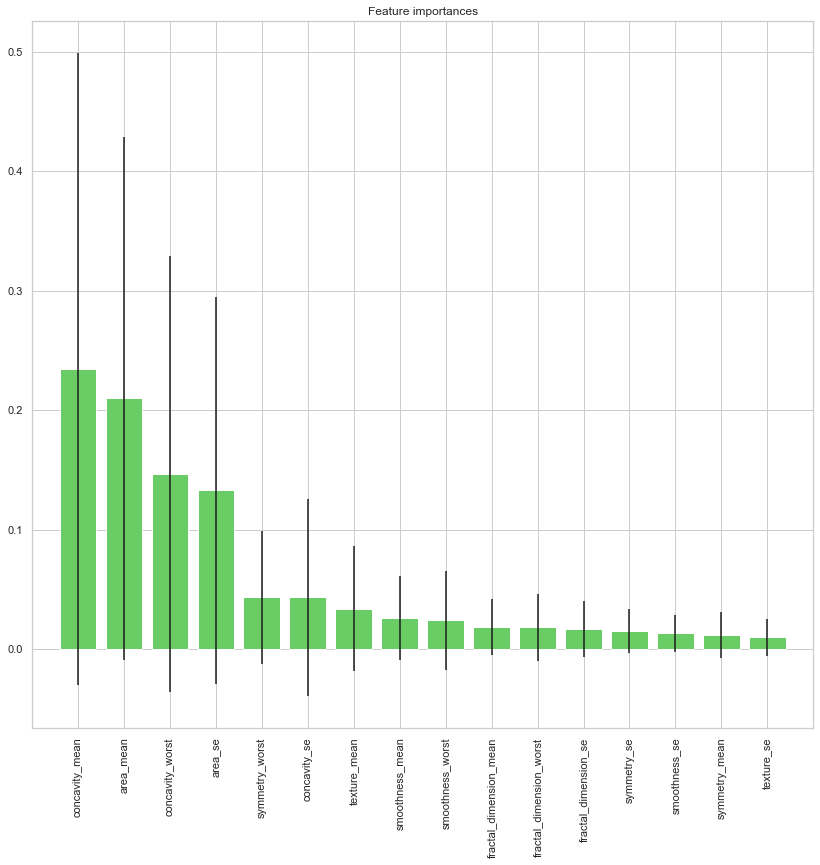

In [76]:



rf_model_5 = RandomForestClassifier()      
rf_model_5.fit(x_train,y_train)
importances = rf_model_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_5.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

## 6. Feature extracion with PCA

Before using PCA the data need to be normalized

Text(0, 0.5, 'explained_variance_ratio_')

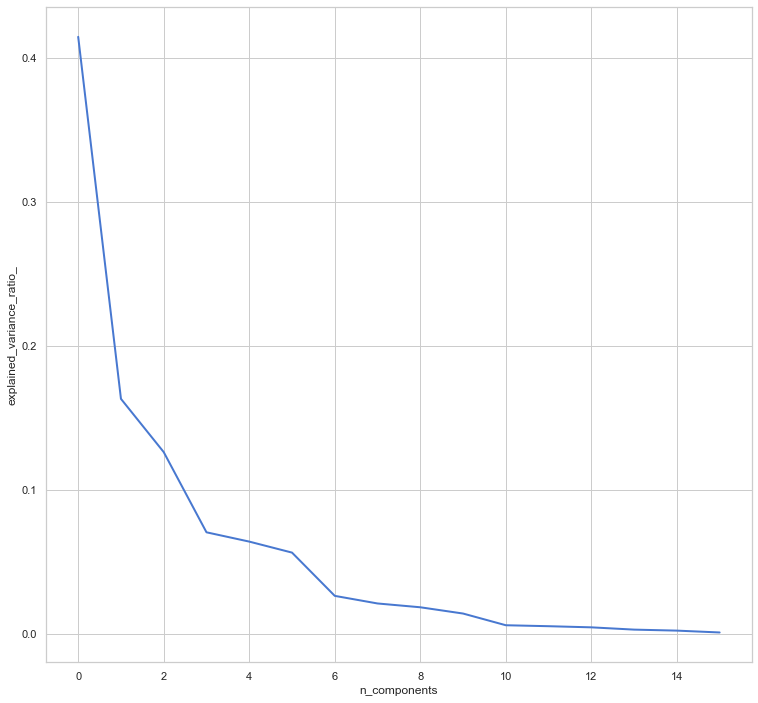

In [86]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
'''
x_train_N = normalize(x_train,axis=1)
x_test_N = normalize(x_test,axis=1)
'''
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())


pca_model = PCA()
pca_model.fit(x_train_N)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca_model.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')